### Author: Allan R. Jeeboo 
### Preferred Name: Vyncent S. A. van der Wolvenhuizen 
### Affiliation: Data Science student at TripleTen 
### Email: vanderwolvenhuizen.vyncent@proton.me
### Date Started: 2025-07-02 
### Last Updated: 2025-07-03 13:32 
--- 
--- 

# 1.0 Introduction 

In this project, we'll be placed in this scenario: 
Rusty Bargain used car sales service is developing an app to attract new customers. In that app, we can quickly find out the market value of our car. We have access to historical data: technical specifications, trim versions, and prices. We need to build the model to determine the value. 

Rusty Bargain is interested in:

- The quality of the prediction
- The speed of the prediction
- The time required for training 

Project instructions
Download and look at the data.
Train different models with various hyperparameters (You should make at least two different models, but more is better. Remember, various implementations of gradient boosting don't count as different models.) The main point of this step is to compare gradient boosting methods with random forest, decision tree, and linear regression.
Analyze the speed and quality of the models.
Notes:

Use the RMSE metric to evaluate the models.
Linear regression is not very good for hyperparameter tuning, but it is perfect for doing a sanity check of other methods. If gradient boosting performs worse than linear regression, something definitely went wrong.
On your own, work with the LightGBM library and use its tools to build gradient boosting models.
Ideally, your project should include linear regression for a sanity check, a tree-based algorithm with hyperparameter tuning (preferably, random forrest), LightGBM with hyperparameter tuning (try a couple of sets), and CatBoost and XGBoost with hyperparameter tuning (optional).
Take note of the encoding of categorical features for simple algorithms. LightGBM and CatBoost have their implementation, but XGBoost requires OHE. 

--- 
--- 

### 1.1 Data Import & Overview 
Let's begin by importing the necessary modules and loading the dataset. We'll then examine the first few rows and review the dataset's structure to gain an initial understanding of the data we'll be working with. 

In [244]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('car_data.csv') 

In [245]:
display(df.head()) 
print(df.shape)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


(354369, 16)


In [246]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

---

### 1.2 Data Description 

Features:
- DateCrawled — date profile was downloaded from the database
- VehicleType — vehicle body type
- RegistrationYear — vehicle registration year
- Gearbox — gearbox type
- Power — power (hp)
- Model — vehicle model
- Mileage — mileage (measured in km due to dataset's regional specifics)
- RegistrationMonth — vehicle registration month
- FuelType — fuel type
- Brand — vehicle brand
- NotRepaired — vehicle repaired or not
- DateCreated — date of profile creation
- NumberOfPictures — number of vehicle pictures
- PostalCode — postal code of profile owner (user)
- LastSeen — date of the last activity of the user

Target:
- Price — price (Euro)

---

### 1.3 Chapter 1 Summary 

In this chapter, we imported the dataset and essential libraries, explored the data’s structure, and clarified the meaning of each column. Several issues became apparent: the column names use capital letters, which is inconsistent with Python’s [PEP 8](https://peps.python.org/pep-0008/) style guide; there are missing values (NaNs) in the data; and three date-related columns—`DateCrawled`, `DateCreated`, and `LastSeen`—along with `NumberOfPictures` and `PostalCode`, don't contribute meaningfully to our analysis. 

# 2.0 Data Preprocessing 
---

### 2.1 Column Adjustments

In [247]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [248]:
df.drop(columns=['DateCrawled', 
                 'DateCreated', 
                 'NumberOfPictures', 
                 'PostalCode', 
                 'LastSeen'], 
                 axis=1, 
                 inplace=True)
df.columns = df.columns.str.lower() 
df.rename(columns={'vehicletype': 'vehicle_type', 
                   'registrationyear': 'registration_year', 
                   'registrationmonth': 'registration_month', 
                   'fueltype': 'fuel_type', 
                   'notrepaired': 'not_repaired'}, 
                   inplace=True) 

df.head() 

,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


---

### 2.2 NaNs

In [249]:
df.isna().sum() 

price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
mileage                   0
registration_month        0
fuel_type             32895
brand                     0
not_repaired          71154
dtype: int64

There are several columns with missing values: `vehicle_type`, `gearbox`, `model`, `fuel_type`, and `not_repaired`. Since these are all categorical features, we can't fill the NaNs with the mean or median. Instead, we'll use the mode (the most frequent value) for each column to fill in the missing data. This approach helps maintain the integrity of the categorical variables.

In [250]:
nan_columns = df.columns[df.isna().any()].tolist()

for column in nan_columns: 
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, 
                      inplace=True)

C:\Users\vande\AppData\Local\Temp\ipykernel_25812\2790415843.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value,


In [251]:
df.isna().sum()

price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
dtype: int64

---

### 2.3 Duplicates

In [252]:
df.duplicated().sum()

np.int64(33266)

In [253]:
df.drop_duplicates(inplace=True) 
display(df.head()) 
print(f'Number of duplicates: {df.duplicated().sum()}')
print(f'Shape: {df.shape}')

,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired
0,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,no
1,18300,coupe,2011,manual,190,golf,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


Number of duplicates: 0
Shape: (321103, 11)


---

### 2.4 Chapter 2 Summary 
In this chapter, we performed essential data preprocessing steps to prepare the dataset for modeling. We removed irrelevant columns, standardized column names to follow PEP 8 guidelines, and addressed missing values in categorical features by filling them with the mode. Duplicate rows were identified and dropped to ensure data quality. These steps resulted in a clean and consistent dataset, ready for further analysis and model development. 

--- 
---

# 3.0 EDA 

In [254]:
df.head()

,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired
0,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,no
1,18300,coupe,2011,manual,190,golf,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


---

### 3.1 Price

In [255]:
df.price.describe() 

count    321103.000000
mean       4425.942504
std        4528.219720
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64

Immediately, I notice that the maximum value is €20,000—more than three times higher than the 75th percentile (€6,400) and about 7.4 times higher than the median (€2,700). This suggests that price is heavily right-skewed. I suspect there's a dense cluster of values at the lower end, with some significant gaps and outliers at the higher end. To confirm this, let's create a histogram and look for potential outliers.

Text(0.5, 1.0, 'Price Distribution')

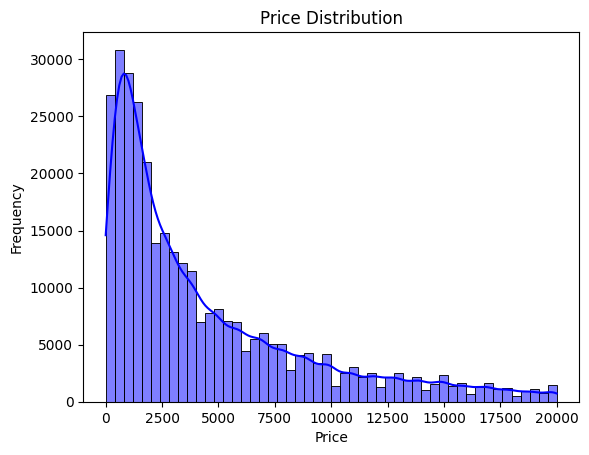

In [256]:
sns.histplot(df.price, 
             bins=50, 
             kde=True, 
             color='blue', 
             edgecolor='black') 

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

The price distribution is indeed heavily right-skewed, as expected. However, contrary to my initial assumption, there are no pronounced gaps or extreme outliers; instead, the distribution maintains a relatively consistent pattern across values.

In [257]:
# Select numeric features (you can add more preprocessing for categorical features)
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['price'])
X = numeric_features
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Print the formula
formula = "price = {:.2f}".format(lr.intercept_)
for feat, coef in zip(X.columns, lr.coef_):
    formula += " + ({:.2f} * {})".format(coef, feat)
print(formula)
# ...existing code...

price = 7222.31 + (0.60 * registration_year) + (3.44 * power) + (-0.04 * mileage) + (125.29 * registration_month)


In [258]:
df.head()

,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired
0,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,no
1,18300,coupe,2011,manual,190,golf,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


---

### 3.2 Vehicle Type

In [259]:
df.vehicle_type.value_counts()

vehicle_type
sedan          116344
small           71955
wagon           58766
bus             26517
convertible     18508
coupe           14953
suv             10894
other            3166
Name: count, dtype: int64

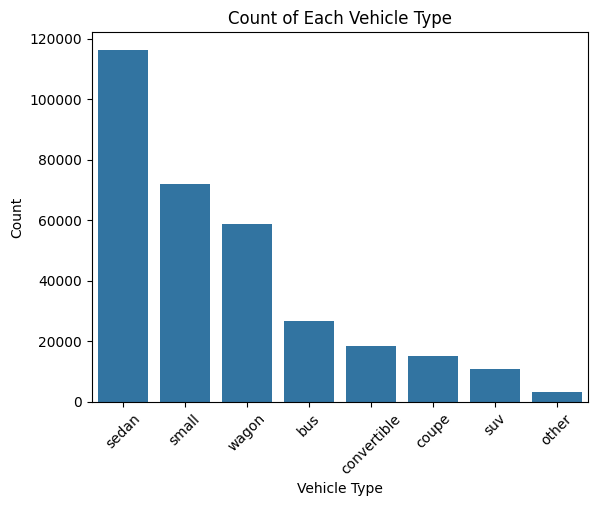

In [260]:
vehicle_counts = df['vehicle_type'].value_counts()
sns.barplot(x=vehicle_counts.index, 
            y=vehicle_counts.values)
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Count of Each Vehicle Type')
plt.xticks(rotation=45)
plt.show()

---

### 3.3 Registration Year

In [261]:
df.registration_year.describe()

count    321103.000000
mean       2004.256506
std          91.838558
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

In [262]:
df.registration_year.value_counts()

registration_year
2000    21766
1999    20529
2005    19963
2001    18250
2006    17877
        ...  
7100        1
8200        1
1946        1
7500        1
3500        1
Name: count, Length: 151, dtype: int64

Wow, I didn't know that they had cars in the year 1000! (*I'm joking*) We even have cars in stock from nearly 8000 years in the future! As we can see, there are some values that are very much out of place, so let's address this by constricting the range to be within 1900 and 2025 (inclusive).

In [263]:
df.shape

(321103, 11)

In [264]:
df = df[(df['registration_year'] >= 1900) & (df['registration_year'] <= 2025)]

In [265]:
df.shape

(320942, 11)

<Axes: xlabel='registration_year', ylabel='Count'>

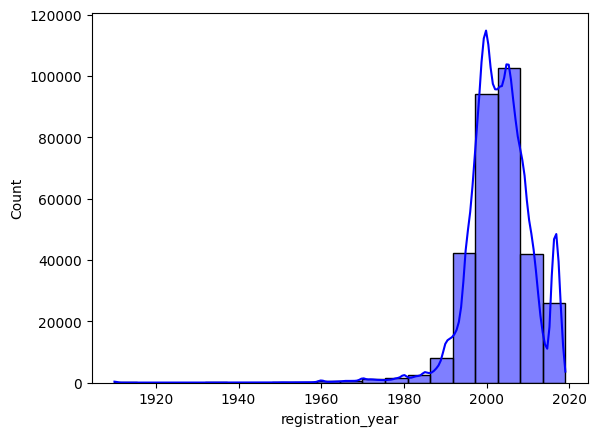

In [266]:
sns.histplot(df.registration_year, 
             bins=20, 
             kde=True, 
             color='blue', 
             edgecolor='black')

In [267]:
check_vals = (df.registration_year < 1960).sum()
check_vals

np.int64(333)

With so few cars from before 1960, keeping or removing them will not significantly affect our analysis. Therefore, I'll keep these records in the dataset. 

---

### 3.4 Gearbox

In [268]:
df.gearbox.unique()

array(['manual', 'auto'], dtype=object)

In [269]:
df.gearbox.value_counts()

gearbox
manual    260462
auto       60480
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Each Gearbox Type')

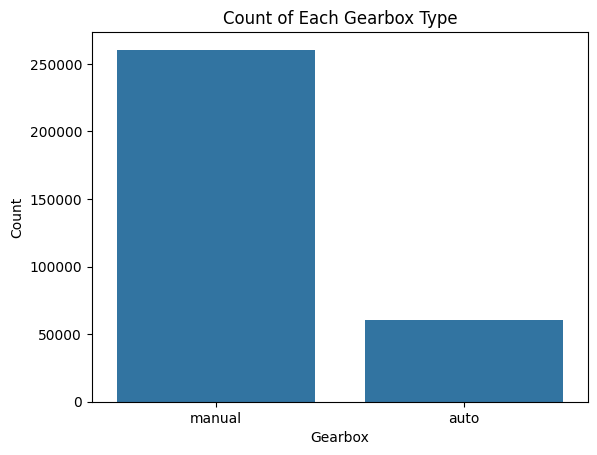

In [270]:
sns.countplot(x='gearbox', data=df)
plt.xlabel('Gearbox')
plt.ylabel('Count')
plt.title('Count of Each Gearbox Type')

As shown above, vehicles with manual transmissions are far more common in the data. 

---

### 3.5 Power

In [271]:
df.power.describe() 

count    320942.000000
mean        110.607879
std         197.129837
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

Cars with 20,000 horsepower don't exist. The vehicle with the highest horsepower is the [2024 Koenigsegg Gemera](https://www.caranddriver.com/news/a44506609/koenigsegg-gemera-production-v8-details/) at 2,300hp and most cars fall into the 100hp to 300hp [range](https://www.jdpower.com/cars/shopping-guides/what-is-the-average-horsepower-of-a-car). Because of this, I'll constrict the values to be between 40hp and 400hp (inclusive).

In [272]:
df = df[(df.power >= 40) & (df.power <= 400)] 
df.shape

(282975, 11)

Text(0.5, 1.0, 'Horsepower Distribution')

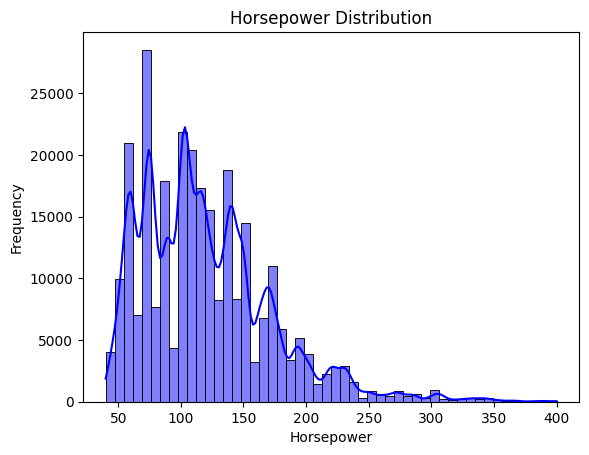

In [273]:
sns.histplot(df.power, 
             bins=50, 
             kde=True, 
             color='blue', 
             edgecolor='black') 

plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.title('Horsepower Distribution')

---

### 3.6 Model

In [274]:
df.model.value_counts()

model
golf                  35950
other                 19533
3er                   16321
polo                  10128
corsa                  9373
                      ...  
kalina                    4
601                       3
rangerover                3
serie_3                   3
range_rover_evoque        1
Name: count, Length: 249, dtype: int64

The Volkswagen Golf is the most common vehicle within the data. 

---

### 3.7 Mileage

In [275]:
df.mileage.describe()

count    282975.000000
mean     128603.798922
std       36687.955538
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: mileage, dtype: float64

Text(0.5, 1.0, 'Mileage Distribution')

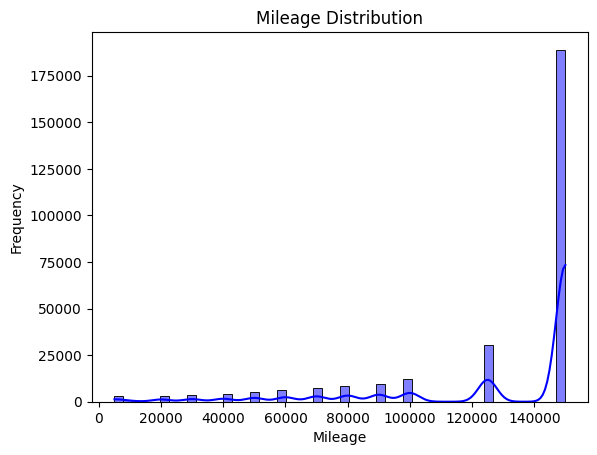

In [276]:
sns.histplot(df.mileage, 
             bins=50, 
             kde=True, 
             color='blue', 
             edgecolor='black') 

plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Mileage Distribution')

This distribution looks odd. Is the mileage data synthetic? 

---

### 3.8 Registration Month

In [278]:
df.registration_month.describe()

count    282975.000000
mean          5.920223
std           3.615724
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: registration_month, dtype: float64

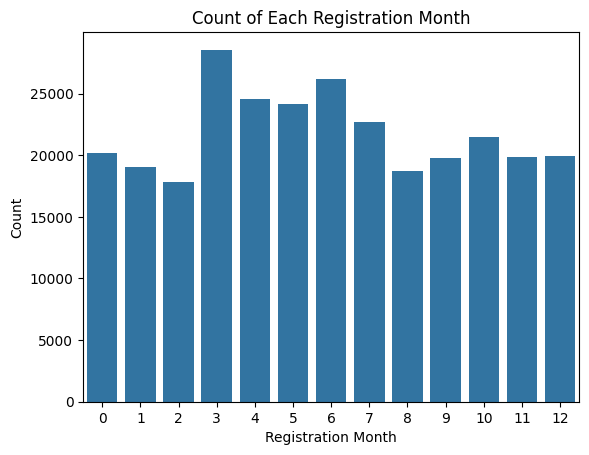

In [289]:
month_counts = df['registration_month'].value_counts().sort_index()
sns.barplot(x=month_counts.index, 
            y=month_counts.values)
plt.xlabel('Registration Month')
plt.ylabel('Count')
plt.title('Count of Each Registration Month')
plt.show()

The distribution is relatively consistent, though March through July appear to see slightly more registrations. 

---

### 3.9 Fuel Type

In [ ]:
df.fuel_type.value_counts() 

fuel_type
petrol      196153
gasoline     81575
lpg           4483
cng            466
hybrid         202
other           57
electric        39
Name: count, dtype: int64

In [291]:
df.fuel_type.value_counts()/df.shape[0]

fuel_type
petrol      0.693181
gasoline    0.288276
lpg         0.015842
cng         0.001647
hybrid      0.000714
other       0.000201
electric    0.000138
Name: count, dtype: float64

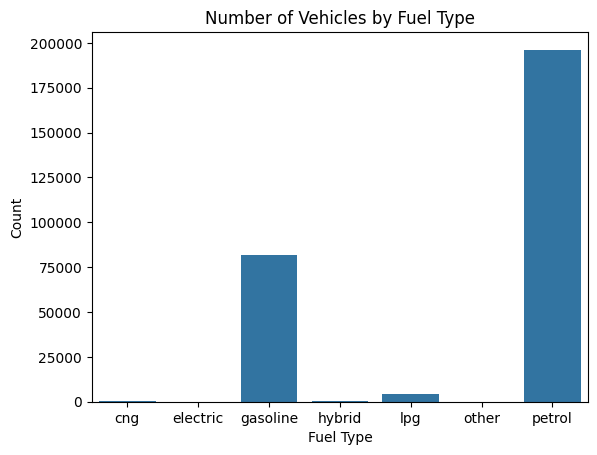

In [290]:
fuel_type_counts = df['fuel_type'].value_counts().sort_index()
sns.barplot(x=fuel_type_counts.index, 
            y=fuel_type_counts.values)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Number of Vehicles by Fuel Type')
plt.show() 

Petrol and gasoline dominate vehicle fuel type, at 69% and 29% respectively. 

---

### 3.10 Brand

In [294]:
df.brand.value_counts()

brand
volkswagen        61000
opel              31208
bmw               30441
mercedes_benz     26033
audi              24362
ford              19947
renault           13552
peugeot            8932
fiat               7240
seat               5708
skoda              4639
mazda              4588
smart              4296
citroen            4118
nissan             3929
toyota             3883
hyundai            2976
mini               2792
volvo              2654
mitsubishi         2489
honda              2382
kia                2015
alfa_romeo         1940
suzuki             1883
sonstige_autos     1632
chevrolet          1405
chrysler           1165
dacia               755
subaru              644
daihatsu            597
jeep                564
porsche             558
saab                455
land_rover          442
jaguar              417
daewoo              402
lancia              385
rover               373
lada                153
trabant              21
Name: count, dtype: int64

In [295]:
df.brand.value_counts()/df.shape[0]

brand
volkswagen        0.215567
opel              0.110285
bmw               0.107575
mercedes_benz     0.091998
audi              0.086092
ford              0.070490
renault           0.047891
peugeot           0.031565
fiat              0.025585
seat              0.020171
skoda             0.016394
mazda             0.016213
smart             0.015182
citroen           0.014553
nissan            0.013885
toyota            0.013722
hyundai           0.010517
mini              0.009867
volvo             0.009379
mitsubishi        0.008796
honda             0.008418
kia               0.007121
alfa_romeo        0.006856
suzuki            0.006654
sonstige_autos    0.005767
chevrolet         0.004965
chrysler          0.004117
dacia             0.002668
subaru            0.002276
daihatsu          0.002110
jeep              0.001993
porsche           0.001972
saab              0.001608
land_rover        0.001562
jaguar            0.001474
daewoo            0.001421
lancia            0.00

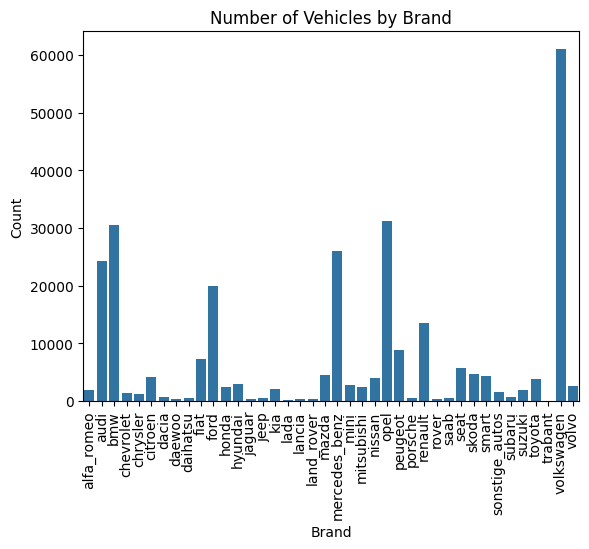

In [300]:
brand_counts = df['brand'].value_counts().sort_index()
sns.barplot(x=brand_counts.index, 
            y=brand_counts.values)
plt.xlabel('Brand') 
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Number of Vehicles by Brand')
plt.show()

In this section, we explored the distribution of car brands in the dataset. The analysis revealed that Volkswagen is the most common brand, followed by Opel, BMW, and Mercedes-Benz. Several other brands, such as Audi, Ford, and Renault, also have a significant presence. Less common brands, including Trabant and Lada, appear much less frequently. This distribution highlights the dominance of a few major brands in the used car market represented by our data. 

---

### 3.11 Not Repaired

In [302]:
df.not_repaired.value_counts()

not_repaired
no     253551
yes     29424
Name: count, dtype: int64

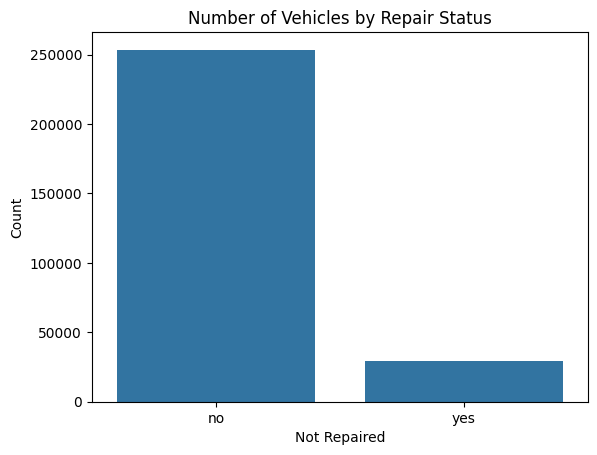

In [303]:
not_repaired_counts = df['not_repaired'].value_counts().sort_index()
sns.barplot(x=not_repaired_counts.index, 
            y=not_repaired_counts.values)
plt.xlabel('Not Repaired') 
plt.ylabel('Count')
plt.title('Number of Vehicles by Repair Status')
plt.show()

---

### 3.12 Chapter 3 Summary 

---
---

# 4.0 Modeling 

---